In [1]:
# importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/sande/OneDrive/Desktop/datasets/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
# checkinmg null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# shuffling data to get data randomized
df=df.sample(frac=1).reset_index(drop=True)

In [8]:
# droping feature car name as its not giving much info
df.drop('Car_Name',axis=1,inplace=True)

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# finding categorical features
def func(val):
    l=[]
    for i in val.columns:
        if val[i].dtypes=='O':
            re=val[i].unique()
            l.append(re)
    return l

In [11]:
func(df)

[array(['Petrol', 'Diesel', 'CNG'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object)]

In [12]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
# creating new feature of current year
df['Current_Year']=2022

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0,2022
1,2014,4.40,7.13,34000,Petrol,Dealer,Manual,0,2022
2,2016,8.35,9.40,19434,Diesel,Dealer,Manual,0,2022
3,2015,0.40,0.55,6700,Petrol,Individual,Manual,0,2022
4,2015,5.80,7.71,25870,Petrol,Dealer,Manual,0,2022


In [15]:
# Subtracting Year from Current Year to get how old car is available
df['Num_Year']=df['Current_Year']-df['Year']

In [16]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Num_Year
0,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0,2022,9
1,2014,4.40,7.13,34000,Petrol,Dealer,Manual,0,2022,8
2,2016,8.35,9.40,19434,Diesel,Dealer,Manual,0,2022,6
3,2015,0.40,0.55,6700,Petrol,Individual,Manual,0,2022,7
4,2015,5.80,7.71,25870,Petrol,Dealer,Manual,0,2022,7


In [17]:
# droping feature which are not required now
df.drop(['Year','Current_Year'],axis=1,inplace=True)

In [18]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Year
0,7.05,18.61,45000,Petrol,Dealer,Manual,0,9
1,4.40,7.13,34000,Petrol,Dealer,Manual,0,8
2,8.35,9.40,19434,Diesel,Dealer,Manual,0,6
3,0.40,0.55,6700,Petrol,Individual,Manual,0,7
4,5.80,7.71,25870,Petrol,Dealer,Manual,0,7


In [19]:
# Replacing the categorical values to numeric value
df=pd.get_dummies(df,drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7.05,18.61,45000,0,9,0,1,0,1
1,4.40,7.13,34000,0,8,0,1,0,1
2,8.35,9.40,19434,0,6,1,0,0,1
3,0.40,0.55,6700,0,7,0,1,1,1
4,5.80,7.71,25870,0,7,0,1,0,1


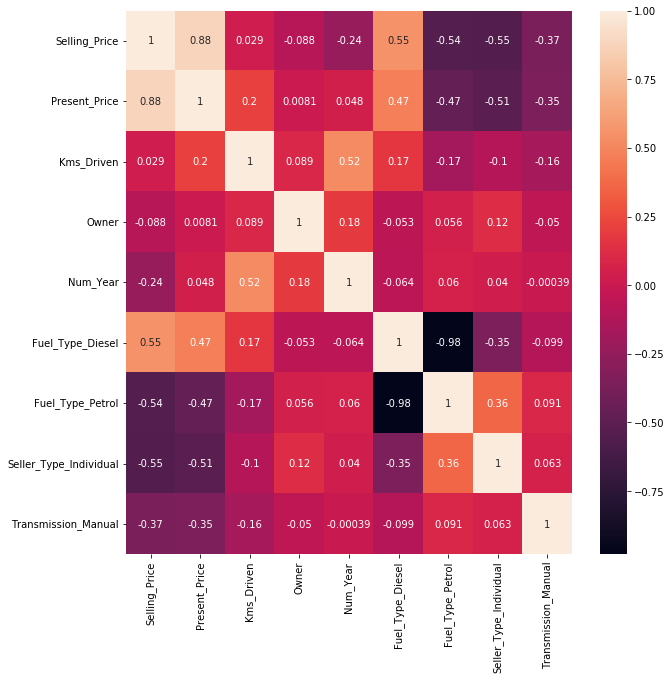

In [21]:
# lets check the correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see the feature Fuel_Type_Diesel and Fuel_Type_Petrol are highly negatively correlated to each other we can remove one feature among them as we have multicollinearity but as we can see feature are very less so not dropping in this case 

In [22]:
# independent feature
x=df.iloc[:,1:]
x.head()

,Present_Price,Kms_Driven,Owner,Num_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,18.61,45000,0,9,0,1,0,1
1,7.13,34000,0,8,0,1,0,1
2,9.40,19434,0,6,1,0,0,1
3,0.55,6700,0,7,0,1,1,1
4,7.71,25870,0,7,0,1,0,1


In [23]:
# dependent feature
y=df.iloc[:,0]
y.head()

0    7.05
1    4.40
2    8.35
3    0.40
4    5.80
Name: Selling_Price, dtype: float64

In [24]:
x.shape

(301, 8)

In [25]:
y.shape

(301,)

In [26]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [27]:
# kfold cross validation
n=KFold(5)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

In [29]:
# applying cross validation to get accuracy of all models
def func(algo):
    scores=cross_val_score(algo,x,y,cv=n)
    print('Accuracy: ',scores)
    print('Average Accuracy: ',np.mean(scores))

In [30]:
func(Ridge())

Accuracy:  [0.90650777 0.8165983  0.81149792 0.81632251 0.79712555]
Average Accuracy:  0.8296104084957105


In [31]:
func(DecisionTreeRegressor())

Accuracy:  [0.95955333 0.81217028 0.96253754 0.79970903 0.92134663]
Average Accuracy:  0.8910633604489883


In [32]:
func(ExtraTreesRegressor())

Accuracy:  [0.97287219 0.90911663 0.97787749 0.79115453 0.92097586]
Average Accuracy:  0.9143993384416719


In [33]:
func(LinearRegression())

Accuracy:  [0.90613454 0.81675636 0.81038614 0.81912726 0.79416727]
Average Accuracy:  0.8293143148015124


In [34]:
func(RandomForestRegressor())

Accuracy:  [0.97292908 0.85188356 0.97573275 0.87350888 0.94145714]
Average Accuracy:  0.9231022800725717


Random Forest, Decision Tree and Extra tree Regressor gives the highest accuracy so we choose this model.

In [78]:
# Finding average error at each iteration 
dtcv=[]
etcv=[]
rfcv=[]
for i in range(10):
    dtcv.append(-cross_val_score(DecisionTreeRegressor(),x,y,cv=n,scoring='neg_mean_squared_error').mean())
    etcv.append(-cross_val_score(ExtraTreesRegressor(),x,y,cv=n,scoring='neg_mean_squared_error').mean())
    rfcv.append(-cross_val_score(RandomForestRegressor(),x,y,cv=n,scoring='neg_mean_squared_error').mean())

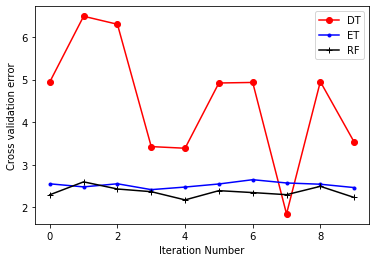

In [79]:
plt.plot(dtcv,'-ro',label='DT')
plt.plot(etcv,'-b.',label='ET')
plt.plot(rfcv,'-k+',label='RF')
plt.xlabel('Iteration Number')
plt.ylabel('Cross validation error')
plt.legend(loc='best')
plt.show()

As we can see Random Forest Regressor has the least error among all models so we choose Random Forest as the best model

In [37]:
# function to get model accuracy with model name
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [38]:
# Train test split
score_rf=[]
for train_index,test_index in n.split(x):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]
    score_rf.append(get_score(RandomForestRegressor(),x_train,x_test,y_train,y_test))

In [39]:
score_rf, np.mean(score_rf)

([0.9750546057832729,
  0.8435390428382664,
  0.9769087598376398,
  0.8702256393869963,
  0.9351222017262122],
 0.9201700499144776)

In [40]:
# fitting training data into model 
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)  # predicting values for test data
pred

array([ 8.0545,  2.776 ,  6.384 ,  0.5866,  2.9175,  2.403 ,  0.7635,
        2.7495,  0.4513,  3.9788,  7.8543,  0.1733,  6.831 ,  2.9455,
        3.0201,  4.489 ,  3.486 ,  4.8831,  6.4811,  2.47  ,  4.6285,
        4.751 ,  4.7915,  1.2735,  0.5592,  2.984 ,  4.392 ,  0.4664,
        3.351 ,  1.1535,  5.2268,  5.435 ,  1.1535,  2.465 ,  5.3195,
        3.8921,  4.1425,  1.1   , 16.4844, 17.318 ,  4.857 ,  5.3395,
        6.8615,  7.6935,  3.7365,  1.1245,  0.3867,  1.0685,  0.3914,
        3.4029,  0.775 ,  7.8854,  0.3622,  5.509 ,  7.7707,  1.4215,
        6.7135,  6.422 ,  0.4534,  0.7467])

In [41]:
# predicting values for training data
train=rf.predict(x_train)
train

array([ 6.9835,  4.262 ,  8.3774,  0.4122,  5.801 ,  2.752 ,  0.1489,
        0.4111, 16.4726,  8.332 ,  4.208 ,  4.8298,  1.1915,  4.543 ,
        5.8847,  0.3769,  6.464 , 10.411 ,  2.4945,  0.2492,  8.913 ,
        4.8495,  1.177 ,  2.9025,  5.6655,  0.5951,  5.386 ,  2.623 ,
        4.6295,  0.6206, 17.0487,  4.6435,  0.5957,  0.3392,  0.2669,
        1.497 ,  7.5725,  2.9455,  0.2516,  5.815 ,  1.6535,  9.077 ,
        5.865 ,  0.4728,  1.0965, 10.0945, 11.5069,  1.1345,  7.0535,
        0.5793,  2.3686,  0.2185, 23.2813,  0.4299,  6.8945,  4.1525,
        3.9545,  4.9375,  4.2505,  5.0005,  0.6785,  4.944 , 30.245 ,
        3.0015,  2.3445,  0.5633,  6.7315,  5.7655,  5.1809,  0.6057,
        2.915 ,  5.1856,  1.544 ,  1.2025,  3.2975,  0.7815,  0.7528,
        0.6163,  8.766 ,  2.481 ,  5.5655,  4.1625,  9.2751,  4.5234,
        7.955 ,  2.8175,  7.8015,  8.8685,  9.9635,  0.4392,  3.8138,
        2.8965,  0.713 ,  5.5445, 13.6854,  8.976 ,  6.008 ,  0.7047,
        0.4159,  5.9

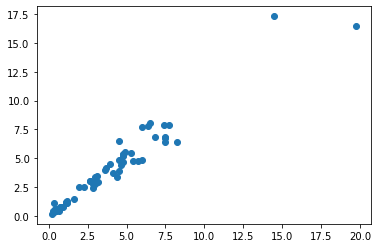

In [42]:
plt.scatter(y_test,pred)
plt.show()

In [43]:
# training accuracy
r2_score(y_train,train)

0.992410365530052

In [44]:
# testing accuracy
r2_score(y_test,pred)

0.9377651281924811

In [45]:
# Hyperparameter Tunning

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,50,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [48]:
### written in key value pair and randomize 
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
           }

In [49]:
cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50, total=   1.5s
[CV] n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50, total=   1.4s
[CV] n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50, total=   1.5s
[CV] n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50, total=   1.3s
[CV] n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=466, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=50, total=   1.2s
[CV] n_estimators=711, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=711, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, total=   2.0s
[CV] n_estimators=711, min_samples_split=2, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [50]:
cv.best_params_

{'n_estimators': 833,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 32}

In [80]:
# applying best parameters to get increase in accuracy
randf=RandomForestRegressor(n_estimators=833,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=32)
randf.fit(x_train,y_train)
y_pred=randf.predict(x_test)
x_pred=randf.predict(x_train)

In [81]:
y_pred

array([ 8.08767535,  2.66443248,  6.56417459,  0.58041118,  2.92663449,
        2.42608248,  0.7410531 ,  2.78958459,  0.45749432,  4.02249742,
        7.94689361,  0.1739354 ,  6.95682848,  2.96869871,  3.08790461,
        4.3558545 ,  3.5607832 ,  4.91899357,  6.09943957,  2.61608248,
        4.5370514 ,  4.70991185,  4.7449126 ,  1.27242169,  0.56072432,
        2.87710459,  4.36763283,  0.46153192,  3.34238728,  1.15652794,
        5.26530307,  5.43967138,  1.15608676,  2.38890911,  5.28288093,
        3.96438216,  4.22285851,  1.09737326, 15.81654271, 17.84123533,
        4.76052765,  5.28864349,  7.03020596,  7.73727632,  3.67878936,
        1.10880567,  0.39892954,  1.06167921,  0.40553358,  3.33642965,
        0.74536586,  7.91853727,  0.36789266,  5.47441563,  7.85296884,
        1.40838747,  6.8332526 ,  6.48053784,  0.46025844,  0.74095946])

In [82]:
x_pred

array([ 6.97134121,  4.34467813,  8.4954856 ,  0.41242709,  5.83880853,
        2.77340221,  0.15758614,  0.4133936 , 17.48045341,  8.28161577,
        4.20669867,  4.90464477,  1.14489894,  4.70689257,  5.77530411,
        0.38605107,  6.44124844, 10.40366305,  2.46728368,  0.2367107 ,
        8.68981023,  4.71732016,  1.16520044,  2.97670987,  5.79720374,
        0.58107463,  5.4914687 ,  2.65501212,  4.5515701 ,  0.62597495,
       15.88642563,  4.75506306,  0.5868777 ,  0.35119016,  0.26528674,
        1.56967255,  7.63850921,  2.9689238 ,  0.26102413,  5.92692107,
        1.69998837,  8.80378833,  5.89900536,  0.4810807 ,  1.10188123,
       10.05017566, 11.59366319,  1.17008077,  6.88139652,  0.56425543,
        2.22868881,  0.23214285, 22.24924619,  0.42439203,  7.02244946,
        4.24278402,  4.13704307,  4.82080338,  4.22548143,  5.03264333,
        0.64871273,  4.87277019, 29.30824296,  2.96303989,  2.54079033,
        0.54587753,  6.53218991,  5.67668871,  5.20321361,  0.61

In [83]:
# after hyperparameter tunning training accuracy
r2_score(y_train,x_pred)

0.9847510203614768

In [84]:
# after hyperparameter tunning testing accuracy
r2_score(y_test,y_pred)

0.9282256855877915

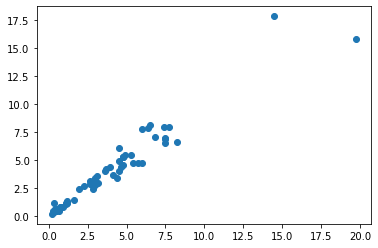

In [85]:
plt.scatter(y_test,y_pred)
plt.show()

In [86]:
# after hyperparameter tunning the errors
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 

MAE: 0.5554145467699791
MSE: 0.8398040664219365
RMSE: 0.9164082422271945


In [88]:
import pickle

In [89]:
pickle.dump(randf,open('car_price.pkl','wb'))